### Used titanic dataset having 14 feauters of each passenger.Predicting whether the passenger survived or not using neural networks 

## Imported needed packages

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


## Dropping unwanted coloumns

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head(5)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,S,7.2500,0,3,male,1,0.0,Mr,1
1,38.0,C,71.2833,0,1,female,1,1.0,Mrs,1
2,26.0,S,7.9250,0,3,female,0,1.0,Miss,0
3,35.0,S,53.1000,0,1,female,1,1.0,Mrs,1
4,35.0,S,8.0500,0,3,male,0,0.0,Mr,0


## Encoding the coloumns

In [ ]:
a=LabelEncoder()  
Sex=a.fit_transform(df['Sex'])
Embarked=a.fit_transform(df['Embarked'])
Title=a.fit_transform(df['Title'])
df['Title']=Title
df['Sex']=Sex
df['Embarked']=Embarked

## Normalizing the values of each coloumn

In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

## Splitting the data into train and test

In [ ]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

## Creating the neural network model

In [ ]:
model = Sequential()
lyrs=[8]
model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation='linear'))
for i in range(1,len(lyrs)):
    model.add(Dense(lyrs[i], activation=act))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Fitting the data to the model

In [ ]:
training = model.fit(X_train, Y_train, epochs=50, batch_size=32,validation_split=0.2, verbose=0)

## Calculation of accuracy score

In [ ]:
scores = model.evaluate(X_train, Y_train)
scores[1]*100

23/23 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7949


79.49438095092773

## Plotting the model accuracy

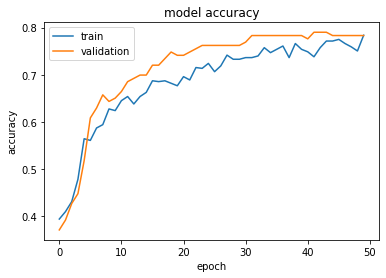

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()